In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOADING DOMINOS DATA
sales_data = pd.read_excel("C:/Users/Darkk/OneDrive/Desktop/DOM/Pizza_Sale.xlsx")
ingredient_data = pd.read_excel("C:/Users/Darkk/OneDrive/Desktop/DOM/Pizza_ingredients.xlsx")


In [3]:
#DATA PREPROCESSING AND CLEANING
print(sales_data.info())
print(sales_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None
pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_pri

In [4]:
# Replace missing values in 'total_price' by the product of 'quantity' and 'unit_price'
sales_data['total_price'].fillna(sales_data['quantity'] * sales_data['unit_price'], inplace=True)


C:\Users\Darkk\AppData\Local\Temp\ipykernel_15996\1365356980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['total_price'].fillna(sales_data['quantity'] * sales_data['unit_price'], inplace=True)


In [5]:
print(sales_data.isnull().sum())

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64


In [6]:
# Fill missing values in 'pizza_name_id' by mapping with 'pizza_name'
name_to_id_mapping = sales_data.set_index('pizza_name')['pizza_name_id'].to_dict()
sales_data['pizza_name_id'] = sales_data['pizza_name'].map(name_to_id_mapping).combine_first(sales_data['pizza_name_id'])


In [7]:
# Fill missing values in 'pizza_ingredients' by mapping with 'pizza_name_id'
ingredients_mapping = sales_data.set_index('pizza_name_id')['pizza_ingredients'].to_dict()
sales_data['pizza_ingredients'] = sales_data['pizza_name_id'].map(ingredients_mapping).combine_first(sales_data['pizza_ingredients'])



In [8]:
# Fill missing values in 'pizza_category' by mapping with 'pizza_name_id' and 'pizza_name'
category_mapping_id = sales_data.set_index('pizza_name_id')['pizza_category'].to_dict()
sales_data['pizza_category'] = sales_data['pizza_name_id'].map(category_mapping_id).combine_first(sales_data['pizza_category'])


In [9]:
# Fill missing values in 'pizza_name' by mapping with 'pizza_name_id'
name_mapping = sales_data.set_index('pizza_name_id')['pizza_name'].to_dict()
sales_data['pizza_name'] = sales_data['pizza_name_id'].map(name_mapping).combine_first(sales_data['pizza_name'])


In [10]:

# Save the cleaned dataset to a new Excel file
sales_data.to_excel('C:/Users/Darkk/OneDrive/Desktop/DOM/Cleaned_Sale.xlsx', index=False)

In [11]:
print(ingredient_data.info())
print(ingredient_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
None
pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64


In [12]:
# Calculate the maximum value of the 'Items_Qty_In_Grams' column, excluding NaN
max_qty_in_grams = ingredient_data['Items_Qty_In_Grams'].max()

# Replace missing values in 'Items_Qty_In_Grams' with the maximum value
ingredient_data['Items_Qty_In_Grams'].fillna(max_qty_in_grams, inplace=True)

C:\Users\Darkk\AppData\Local\Temp\ipykernel_15996\1153496522.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingredient_data['Items_Qty_In_Grams'].fillna(max_qty_in_grams, inplace=True)


In [13]:
# Save the cleaned dataset to a new Excel file
ingredient_data.to_excel('C:/Users/Darkk/OneDrive/Desktop/DOM/cleaned_Ingredient_Data.xlsx', index=False)

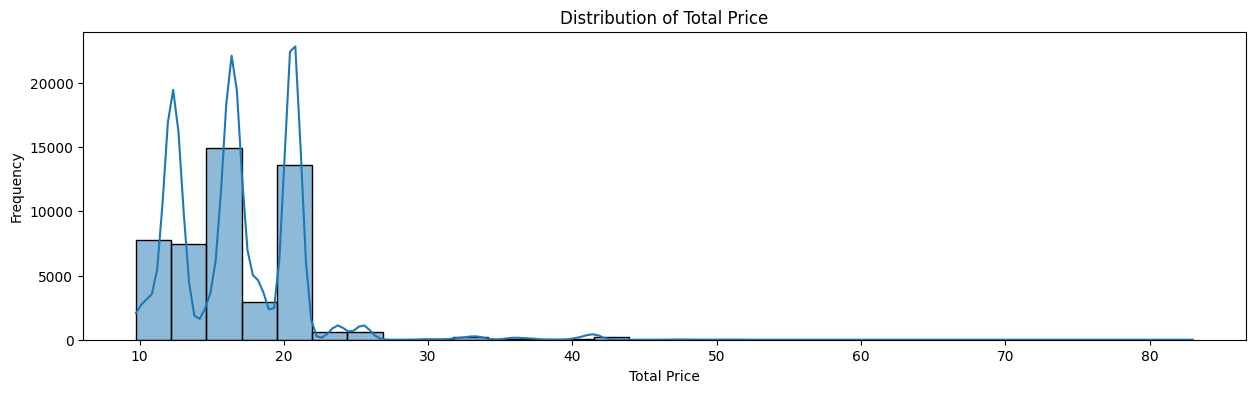

In [14]:
# 
#DISTRIBUTION OF TOTAL SALES
plt.figure(figsize=(15, 4))
sns.histplot(sales_data['total_price'], bins=30, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()



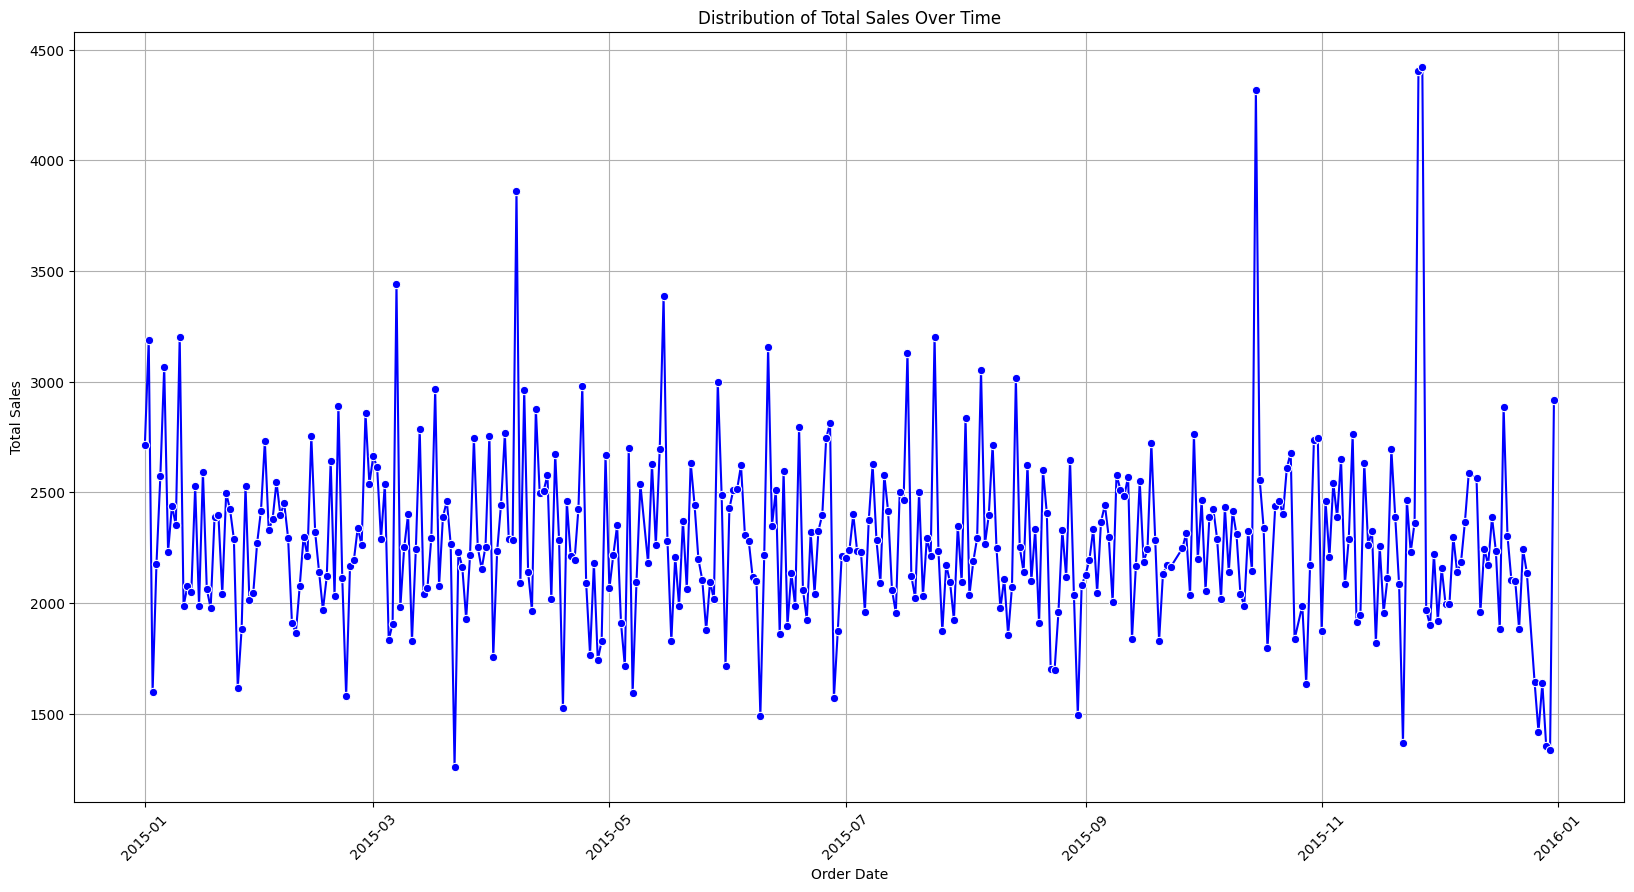

In [15]:
# Convert 'order_date' to datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Group by order_date and sum the total_price
total_sales_by_date = sales_data.groupby('order_date')['total_price'].sum().reset_index()

# Plot the distribution of total sales over time
plt.figure(figsize=(20,10))
sns.lineplot(data=total_sales_by_date, x='order_date', y='total_price', marker='o', color='b')
plt.title('Distribution of Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

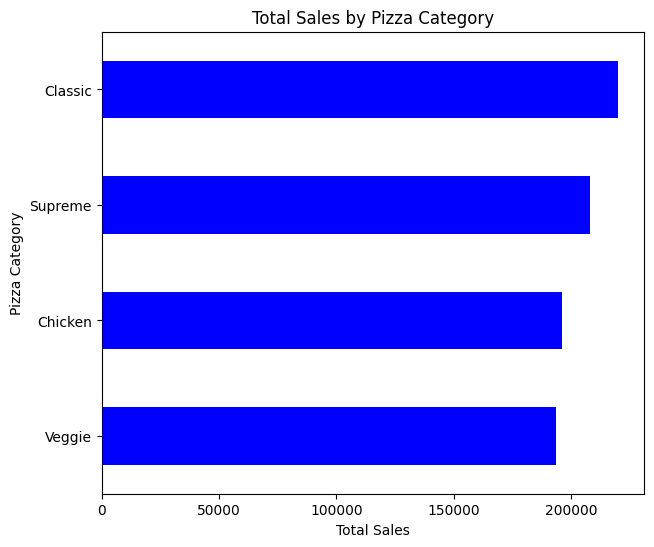

In [16]:
#Total Sales by Pizza Category
plt.figure(figsize=(7, 6))
sales_by_category = sales_data.groupby('pizza_category')['total_price'].sum().sort_values()
sales_by_category.plot(kind='barh', color='blue')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Category')
plt.show()


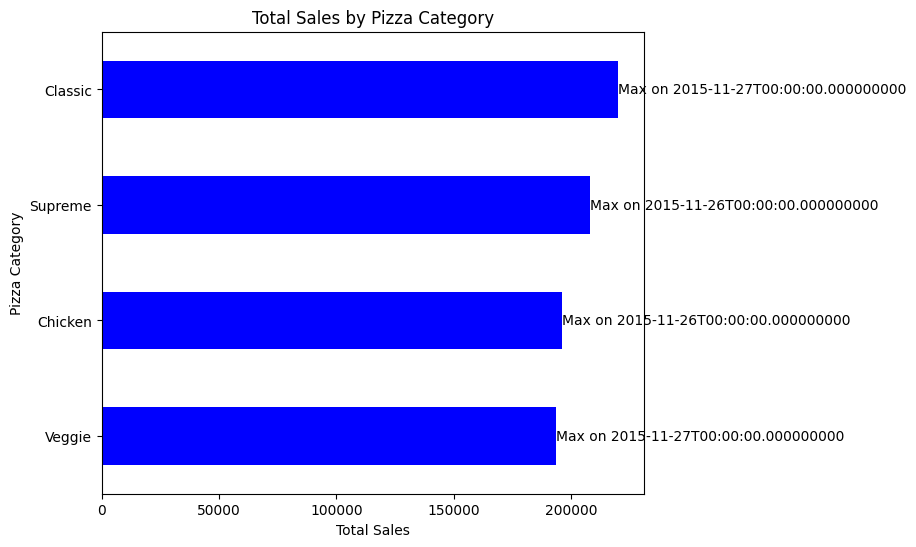

In [17]:
# Grouping sales by pizza category and date or day of the week
sales_by_category_and_date = sales_data.groupby(['pizza_category', 'order_date'])['total_price'].sum().reset_index()

# Find the date with maximum sales for each pizza category
max_sales_by_category = sales_by_category_and_date.loc[sales_by_category_and_date.groupby('pizza_category')['total_price'].idxmax()]

# Combine this with total sales by category
sales_by_category = sales_data.groupby('pizza_category')['total_price'].sum().sort_values()

# Create the plot
plt.figure(figsize=(7, 6))
sales_by_category.plot(kind='barh', color='blue')

# Add labels for the date with the maximum sales
for index, value in enumerate(sales_by_category.index):
    max_date = max_sales_by_category[max_sales_by_category['pizza_category'] == value]['order_date'].values[0]
    max_sales = max_sales_by_category[max_sales_by_category['pizza_category'] == value]['total_price'].values[0]
    plt.text(sales_by_category[value] + 50, index, f'Max on {max_date}', va='center')

# Set the plot title and labels
plt.title('Total Sales by Pizza Category')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Category')

plt.show()


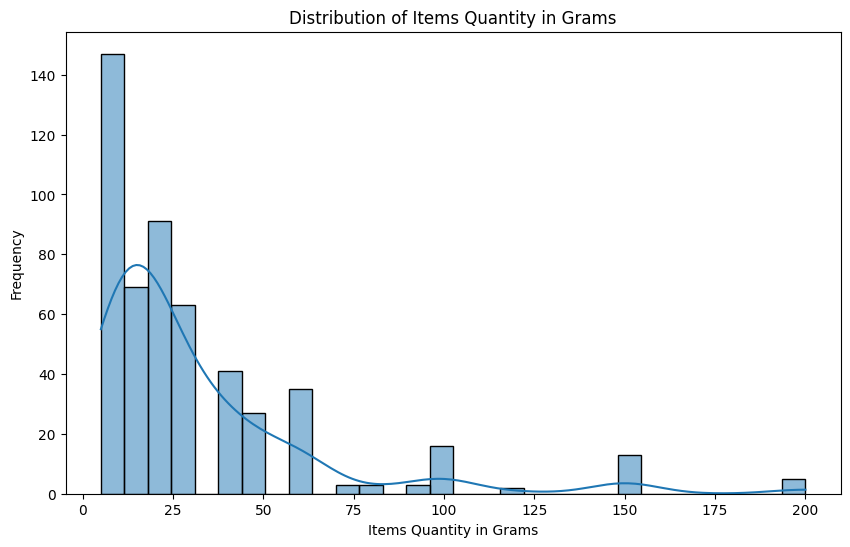

In [18]:
#Distribution of Items Quantity in Grams
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_data['Items_Qty_In_Grams'], bins=30, kde=True)
plt.title('Distribution of Items Quantity in Grams')
plt.xlabel('Items Quantity in Grams')
plt.ylabel('Frequency')
plt.show()


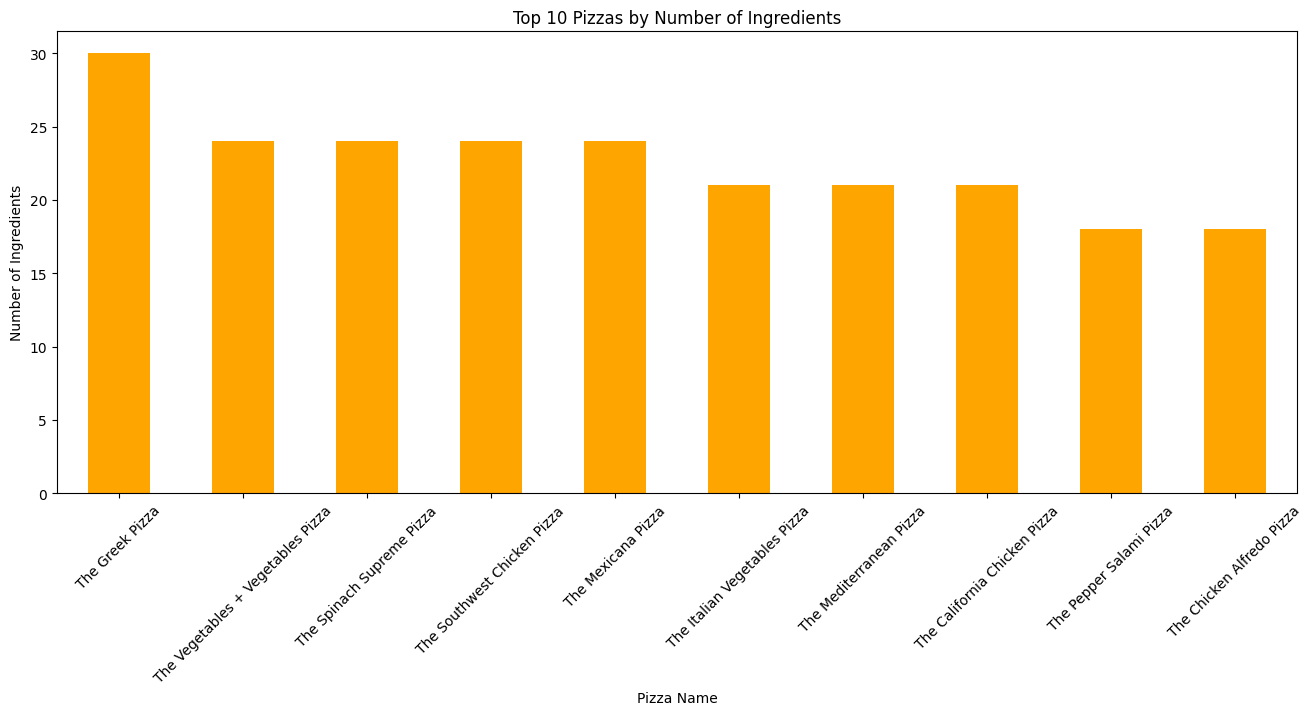

In [19]:
#Ingredients Count by Pizza Name
plt.figure(figsize=(16,6))
ingredients_count = ingredient_data.groupby('pizza_name')['pizza_ingredients'].count().sort_values(ascending=False).head(10)
ingredients_count.plot(kind='bar', color='orange')
plt.title('Top 10 Pizzas by Number of Ingredients')
plt.xlabel('Pizza Name')
plt.ylabel('Number of Ingredients')
plt.xticks(rotation=45)
plt.show()


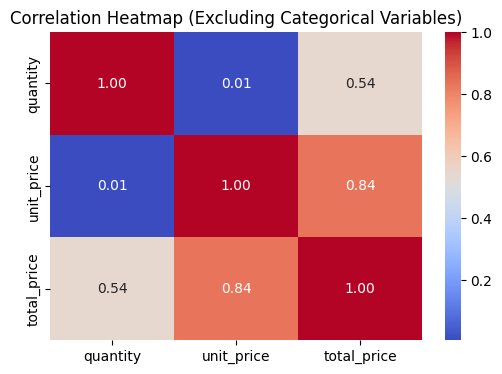

In [20]:
# Select only the relevant numeric columns: 'quantity', 'unit_price', and 'total_price'
numeric_columns = sales_data[['quantity', 'unit_price', 'total_price']]

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the refined correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Excluding Categorical Variables)')
plt.show()



In [21]:
# Feature Engineering
sales_data['day_of_week'] = sales_data['order_date'].dt.dayofweek
sales_data['month'] = sales_data['order_date'].dt.month
sales_data['year'] = sales_data['order_date'].dt.year

In [22]:
# Prepare Data for Time Series Forecasting
sales_time_series = sales_data.groupby(['order_date', 'pizza_name_id']).agg({'quantity': 'sum'}).reset_index()

In [23]:
# Outlier Detection
sales_time_series['z_score'] = (sales_time_series['quantity'] - sales_time_series['quantity'].mean()) / sales_time_series['quantity'].std()
threshold = 3
sales_filtered = sales_time_series[np.abs(sales_time_series['z_score']) <= threshold]
sales_outliers = sales_time_series[np.abs(sales_time_series['z_score']) > threshold]

In [24]:
# Drop z_score column
sales_filtered = sales_filtered.drop(columns=['z_score'])

In [25]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from prophet import Prophet
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


Importing plotly failed. Interactive plots will not work.


In [26]:
# Model Evaluation
def evaluate_models(sales_data):
    train_size = int(len(sales_data) * 0.8)
    train, test = sales_data[:train_size], sales_data[train_size:]
    results = {}

    # ARIMA
    try:
        arima_model = ARIMA(train['quantity'], order=(1, 1, 1))
        arima_fit = arima_model.fit()
        arima_forecast = arima_fit.forecast(steps=len(test))
        results['ARIMA'] = mean_absolute_percentage_error(test['quantity'], arima_forecast)
    except Exception as e:
        print(f"ARIMA Error: {e}")

    # SARIMA
    try:
        sarima_model = SARIMAX(train['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        sarima_fit = sarima_model.fit()
        sarima_forecast = sarima_fit.forecast(steps=len(test))
        results['SARIMA'] = mean_absolute_percentage_error(test['quantity'], sarima_forecast)
    except Exception as e:
        print(f"SARIMA Error: {e}")

    # Prophet
    try:
        prophet_data = train.reset_index().rename(columns={'order_date': 'ds', 'quantity': 'y'})
        prophet_model = Prophet()
        prophet_model.fit(prophet_data)
        future = prophet_model.make_future_dataframe(periods=len(test))
        prophet_forecast = prophet_model.predict(future)['yhat'][-len(test):]
        results['Prophet'] = mean_absolute_percentage_error(test['quantity'], prophet_forecast)
    except Exception as e:
        print(f"Prophet Error: {e}")

    # LSTM
    try:
        scaler = MinMaxScaler()
        train_scaled = scaler.fit_transform(train['quantity'].values.reshape(-1, 1))
        X, y = [], []
        for i in range(1, len(train_scaled)):
            X.append(train_scaled[i-1:i, 0])
            y.append(train_scaled[i, 0])
        X, y = np.array(X), np.array(y)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        lstm_model = Sequential()
        lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
        lstm_model.add(LSTM(50))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')
        lstm_model.fit(X, y, epochs=100, batch_size=32, verbose=0)

        # Prepare test data for LSTM
        test_scaled = scaler.transform(test['quantity'].values.reshape(-1, 1))
        X_test = []
        for i in range(1, len(test_scaled)):
            X_test.append(test_scaled[i-1:i, 0])
        X_test = np.array(X_test).reshape((len(X_test), 1, 1))
        lstm_forecast = lstm_model.predict(X_test)
        lstm_forecast = scaler.inverse_transform(lstm_forecast)
        results['LSTM'] = mean_absolute_percentage_error(test['quantity'].values[1:], lstm_forecast.flatten())
    except Exception as e:
        print(f"LSTM Error: {e}")

    # Linear Regression
    try:
        X_train = np.array(range(len(train))).reshape(-1, 1)
        y_train = train['quantity'].values
        X_test = np.array(range(len(train), len(train) + len(test))).reshape(-1, 1)

        reg_model = LinearRegression()
        reg_model.fit(X_train, y_train)
        reg_forecast = reg_model.predict(X_test)
        results['Linear Regression'] = mean_absolute_percentage_error(test['quantity'], reg_forecast)
    except Exception as e:
        print(f"Linear Regression Error: {e}")

    return results

In [27]:
# Evaluate models
results = evaluate_models(sales_filtered)
print("Model Evaluation Results (MAPE):")
print(results)


c:\Users\Darkk\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Darkk\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Darkk\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Darkk\AppData\Local\Programs\Python\Python312\Lib

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Model Evaluation Results (MAPE):
{'ARIMA': 0.7703247270915268, 'SARIMA': 0.7985764642399097, 'Prophet': 0.8302386020097587, 'LSTM': 0.7703806014015918, 'Linear Regression': 0.7636122278123232}


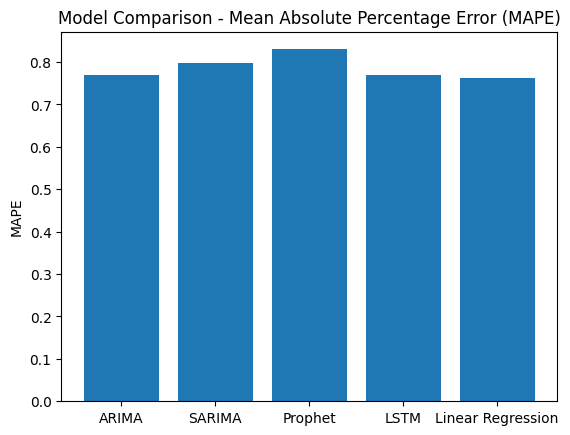

In [28]:
# Visualizing Results
plt.bar(results.keys(), results.values())
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.ylabel('MAPE')
plt.show()

In [29]:
sales_filtered = sales_data[['order_date', 'quantity']].copy()
sales_filtered['order_date'] = pd.to_datetime(sales_filtered['order_date'])
sales_filtered.columns = ['ds', 'y']  # Prophet requires 'ds' for date and 'y' for target

# Fit the Prophet model
model = Prophet()
model.fit(sales_filtered)

# Make a 7-day forecast
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Extract the predicted sales for the next week
predicted_sales = forecast[['ds', 'yhat']].tail(7)['yhat']
print(f"Predicted Sales for Next Week: {predicted_sales}")

# Calculate required quantities of ingredients based on predicted sales
# For the example, I'm assuming a simple sum of the forecasted sales
total_predicted_sales = predicted_sales.sum()

# Load ingredient data and calculate required quantities of ingredients
ingredient_requirements = ingredient_data.copy()
ingredient_requirements['quantity_needed'] = ingredient_requirements['Items_Qty_In_Grams'] * total_predicted_sales


09:46:47 - cmdstanpy - INFO - Chain [1] start processing
09:46:48 - cmdstanpy - INFO - Chain [1] done processing


Predicted Sales for Next Week: 358    1.020125
359    1.020950
360    1.024665
361    1.018853
362    1.024369
363    1.024500
364    1.022624
Name: yhat, dtype: float64


In [30]:
# Save purchase order
ingredient_requirements.to_excel("C:/Users/Darkk/OneDrive/Desktop/DOM/purchase_order_prophet.xlsx", index=False)

print("Purchase order generated successfully!")

Purchase order generated successfully!


In [31]:
# Load the purchase order data
file_path = "C:/Users/Darkk/OneDrive/Desktop/DOM/purchase_order_prophet.xlsx"
purchase_order_data = pd.read_excel(file_path)

print(purchase_order_data.head(10))


  pizza_name_id                  pizza_name  pizza_ingredients  \
0     bbq_ckn_l  The Barbecue Chicken Pizza  Barbecued Chicken   
1     bbq_ckn_l  The Barbecue Chicken Pizza        Red Peppers   
2     bbq_ckn_l  The Barbecue Chicken Pizza      Green Peppers   
3     bbq_ckn_l  The Barbecue Chicken Pizza           Tomatoes   
4     bbq_ckn_l  The Barbecue Chicken Pizza         Red Onions   
5     bbq_ckn_l  The Barbecue Chicken Pizza     Barbecue Sauce   
6     bbq_ckn_m  The Barbecue Chicken Pizza  Barbecued Chicken   
7     bbq_ckn_m  The Barbecue Chicken Pizza        Red Peppers   
8     bbq_ckn_m  The Barbecue Chicken Pizza      Green Peppers   
9     bbq_ckn_m  The Barbecue Chicken Pizza           Tomatoes   

   Items_Qty_In_Grams  quantity_needed  
0                  40       286.243436  
1                  15       107.341288  
2                  20       143.121718  
3                  30       214.682577  
4                  60       429.365154  
5                  15      

In [32]:
unique_ingredients_count = purchase_order_data['pizza_ingredients'].nunique()
print(f"Number of unique ingredients: {unique_ingredients_count}")

Number of unique ingredients: 64


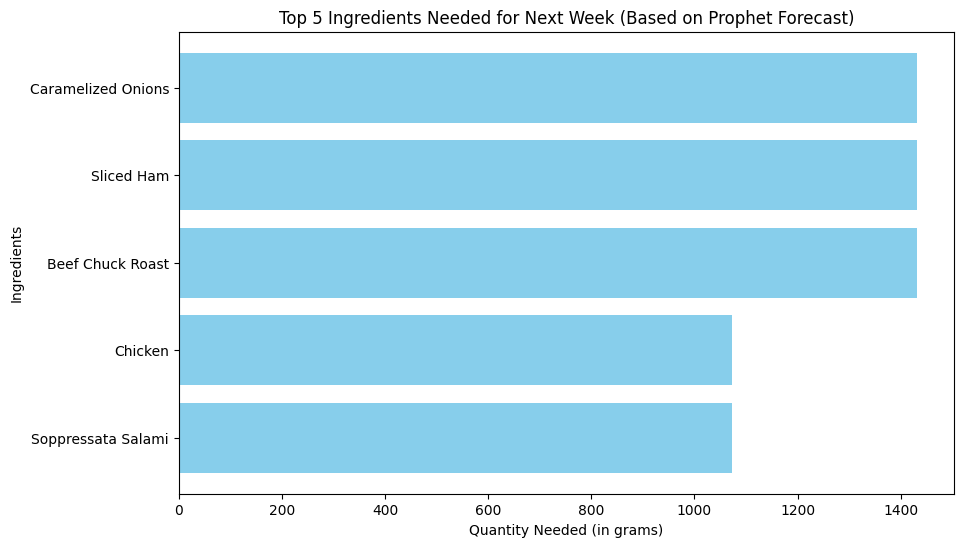

In [33]:
#Sort data by 'quantity_needed' in descending order and select the top 5 ingredients
top_5_ingredients = purchase_order_data.sort_values(by='quantity_needed', ascending=False).head(10)

# Create a horizontal bar chart for the top 5 ingredients
plt.figure(figsize=(10,6))
plt.barh(top_5_ingredients['pizza_ingredients'], top_5_ingredients['quantity_needed'], color='skyblue')
plt.xlabel('Quantity Needed (in grams)')
plt.ylabel('Ingredients')
plt.title('Top 5 Ingredients Needed for Next Week (Based on Prophet Forecast)')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()